In [131]:
import torch
import json
import numpy as np
import math
import cv2

In [132]:
# cuda 연결 확인 코드
import torch
print(torch.cuda.is_available())

True


In [133]:
def cal_2d_distance(x1, y1, x2, y2):
    x = x2 - x1
    y = y2 - y1
    return math.sqrt(x**2 + y**2)

In [134]:
with open('AlphaPose/examples/results/alphapose_unnormal.json', "r") as f:
    alpha_data = json.load(f)

k = ['Nose', 'LEye', 'REye', 'LEar', 'REar', 'LShoulder', 'RShoulder', 'LElbow', 'RElbow', 'LWrist', 'RWrist',
'LHip', 'RHip', 'LKnee', 'Rknee', 'LAnkle', 'RAnkle', 'Head', 'Neck', 'Hip', 'LBigToe', 'RBigToe', 'LSmallToe', 'RSmallToe', 'LHeel', 'RHeel']
ex = alpha_data[0]['keypoints']
print("0.jpg value------------------------------------------------------------")
for i in range(26*3):
    if i % 3 == 0: print(k[i//3], [i, i+2], ":", ex[i+0:i+3])

0.jpg value------------------------------------------------------------
Nose [0, 2] : [400.6236267089844, 123.55967712402344, 0.9381927847862244]
LEye [3, 5] : [423.7188720703125, 100.46441650390625, 0.9561219811439514]
REye [6, 8] : [365.9807434082031, 100.46441650390625, 0.9244382977485657]
LEar [9, 11] : [446.81414794921875, 123.55967712402344, 0.9900296330451965]
REar [12, 14] : [331.33782958984375, 123.55967712402344, 0.9638879895210266]
LShoulder [15, 17] : [516.0999145507812, 239.03598022460938, 0.9357399344444275]
RShoulder [18, 20] : [285.1473083496094, 296.7741394042969, 0.9177625775337219]
LElbow [21, 23] : [550.7427978515625, 412.25042724609375, 0.9017195701599121]
RElbow [24, 26] : [285.1473083496094, 481.5362243652344, 0.9295486807823181]
LWrist [27, 29] : [550.7427978515625, 573.917236328125, 0.9487732648849487]
RWrist [30, 32] : [285.1473083496094, 643.2030639648438, 0.8878740072250366]
LHip [33, 35] : [481.45703125, 597.0125122070312, 0.9026874303817749]
RHip [36, 38] 

In [135]:
motion_data = np.load('MotionBERT/examples/results/motionbert_unnormal.npy')

k = ['root', 'RHip', 'RKnee', 'RAnkle', 'LHip', 'LKnee', 'LAnkle', 'torso', 'neck', 'nose', 'head', 'LShoulder', 'LElbow', 'LWrist', 'RShoulder', 'RElbow', 'RWrist']
frame = 0
print(frame, "frame---------------------------------------")
for i, key in enumerate(motion_data[frame]):
    print(i, "-", k[i], ":", key)

0 frame---------------------------------------
0 - root : [0.03768173 0.05005858 0.        ]
1 - RHip : [-0.1000087   0.08143686  0.00129454]
2 - RKnee : [-0.08476543  0.5595484   0.11303172]
3 - RAnkle : [-0.09197865  0.9423065   0.23928683]
4 - LHip : [0.16553575 0.06564985 0.03721961]
5 - LKnee : [0.1290741  0.5565841  0.12816444]
6 - LAnkle : [0.10348095 0.94157517 0.24331982]
7 - torso : [ 0.014557   -0.30375177 -0.05320794]
8 - neck : [-0.02445125 -0.645584   -0.14199507]
9 - nose : [-0.00713882 -0.8157228  -0.26700154]
10 - head : [-0.01392266 -0.9944185  -0.24872652]
11 - LShoulder : [ 0.21354595 -0.6147522  -0.10536033]
12 - LElbow : [ 0.27860343 -0.27429682  0.06236859]
13 - LWrist : [0.27588317 0.01656048 0.07011461]
14 - RShoulder : [-0.21510932 -0.49337065 -0.11883163]
15 - RElbow : [-0.20651954 -0.1483562   0.03170614]
16 - RWrist : [-0.21250343  0.14715345  0.09092017]


In [136]:
def visual_alpha_result(file_path):

    with open(file_path, "r") as f:
        alpha_data = json.load(f)
    
    alpha_list = []
    for alpha_data_frame in alpha_data:
        alpha_list.append(alpha_data_frame['keypoints'])
    alpha_npdata = np.array(alpha_list)
    print("alpha_npdata.shape:", alpha_npdata.shape)
    alpha_npmean = np.mean(alpha_npdata, axis=0)
    print("alpha_npmean.shape:", alpha_npmean.shape)
    
    # 골반 기울기 검사
    print("\n-------------mean hip-------------")
    mean_l_hip = alpha_npmean[33:35]
    mena_r_hip = alpha_npmean[36:38]
    mean_hip_rad = math.atan2(mean_l_hip[1] - mena_r_hip[1], mean_l_hip[0] - mena_r_hip[0])
    mean_hip_deg = (mean_hip_rad*180)/math.pi
    print("rad:", mean_hip_rad, "/ abs rad:", abs(mean_hip_rad))
    print("deg:", mean_hip_deg, "/ abs_deg:", abs(mean_hip_deg))

    print("\n----------------mean shoulder----------------")
    mean_l_shoulder = alpha_npmean[15:17]
    mean_r_shoulder = alpha_npmean[18:20]
    mean_shoulder_rad = math.atan2(mean_l_shoulder[1] - mean_r_shoulder[1], mean_l_shoulder[0] - mean_r_shoulder[0])
    mean_shoulder_deg = (mean_shoulder_rad*180)/math.pi
    print("rad:", mean_shoulder_rad, "/ abs rad:", abs(mean_shoulder_rad))
    print("deg:", mean_shoulder_deg, "/ abs_deg:", abs(mean_shoulder_deg))

    frame = 0
    val = alpha_data[frame]['keypoints']

    # 골반 기울기 검사
    print("\n-------------골반 기울기-------------")
    l_hip = val[33:35]
    r_hip = val[36:38]
    hip_rad = math.atan2(l_hip[1] - r_hip[1], l_hip[0] - r_hip[0])
    hip_deg = (hip_rad*180)/math.pi
    print("rad:", hip_rad, "/ abs rad:", abs(hip_rad))
    print("deg:", hip_deg, "/ abs_deg:", abs(hip_deg))

    # 어깨 기울기 검사
    print("\n-------------어깨 기울기-------------")
    l_shoulder = val[15:17]
    r_shoulder = val[18:20]
    shoulder_rad = math.atan2(l_shoulder[1] - r_shoulder[1], l_shoulder[0] - r_shoulder[0])
    shoulder_deg = (shoulder_rad*180)/math.pi
    print("rad:", shoulder_rad, "/ abs rad:", abs(shoulder_rad))
    print("deg:", shoulder_deg, "/ abs_deg:", abs(shoulder_deg))

In [137]:
def visual_motion_result(file_path):

    motion_data = np.load(file_path)
    print("motion data shape:", motion_data.shape) # (프레임 개수, 키포인트, (x,y,z) 좌표) 

    frame = 0
    val = motion_data[frame]

    # 거북목 증후군 검사
    print("\n---------------거북목---------------")
    head = val[10]
    neck = val[8]
    tutle_xz = cal_2d_distance(head[0], head[2], neck[0], neck[2])
    turtle_rad_3d = math.atan2(head[1] - neck[1], tutle_xz)
    turtle_deg_3d = (turtle_rad_3d*180)/math.pi
    print("rad:", turtle_rad_3d, "/ abs rad:", abs(turtle_rad_3d))
    print("deg:", turtle_deg_3d, "/ abs_deg:", abs(turtle_deg_3d))

    # 골반 기울기 검사
    print("\n-------------골반 기울기-------------")
    l_hip = val[4]
    r_hip = val[1]
    hip_xz = cal_2d_distance(l_hip[0], l_hip[2], r_hip[0], r_hip[2])
    hip_rad_3d = math.atan2(l_hip[1] - r_hip[1], hip_xz)
    hep_deg_3d = (hip_rad_3d*180)/math.pi
    print("rad:", hip_rad_3d, "/ abs rad:", abs(hip_rad_3d))
    print("deg:", hep_deg_3d, "/ abs_deg:", abs(hep_deg_3d))

    # 어깨 기울기 검사
    print("\n-------------어깨 기울기-------------")
    l_shoulder = val[11]
    r_shoulder = val[14]
    shoulder_xz = cal_2d_distance(l_shoulder[0], l_shoulder[2], r_shoulder[0], r_shoulder[2])
    shoulder_rad_3d = math.atan2(l_shoulder[1] - r_shoulder[1], shoulder_xz)
    shoulder_deg_3d = (shoulder_rad_3d*180)/math.pi
    print("rad:", shoulder_rad_3d, "/ abs rad:", abs(shoulder_rad_3d))
    print("deg:", shoulder_deg_3d, "/ abs_deg:", abs(shoulder_deg_3d), "\n")

    copyed_data = motion_data.copy()
    data_len = len(copyed_data)
    threshold = int(data_len * 0.2)
    middle_data = copyed_data[threshold:data_len-threshold]
    print("threshold:", threshold, ", middle_data:", middle_data.shape)
    mean_data = np.mean(middle_data, axis=0)
    
    print("\n---------------mean turtle neck---------------")
    head = mean_data[10]
    neck = mean_data[8]
    tutle_xz = cal_2d_distance(head[0], head[2], neck[0], neck[2])
    turtle_rad_3dm = math.atan2(head[1] - neck[1], tutle_xz)
    turtle_deg_3dm = (turtle_rad_3dm*180)/math.pi
    print("rad:", turtle_rad_3dm, "/ abs rad:", abs(turtle_rad_3dm))
    print("deg:", turtle_deg_3dm, "/ abs_deg:", abs(turtle_deg_3dm))

    print("\n-------------mean hip-------------")
    l_hip = mean_data[4]
    r_hip = mean_data[1]
    hip_xz = cal_2d_distance(l_hip[0], l_hip[2], r_hip[0], r_hip[2])
    hip_rad_3dm = math.atan2(l_hip[1] - r_hip[1], hip_xz)
    hep_deg_3dm = (hip_rad_3dm*180)/math.pi
    print("rad:", hip_rad_3dm, "/ abs rad:", abs(hip_rad_3dm))
    print("deg:", hep_deg_3dm, "/ abs_deg:", abs(hep_deg_3dm))

    print("\n-------------mean shoulder-------------")
    l_shoulder = mean_data[11]
    r_shoulder = mean_data[14]
    shoulder_xz = cal_2d_distance(l_shoulder[0], l_shoulder[2], r_shoulder[0], r_shoulder[2])
    shoulder_rad_3dm = math.atan2(l_shoulder[1] - r_shoulder[1], shoulder_xz)
    shoulder_deg_3dm = (shoulder_rad_3dm*180)/math.pi
    print("rad:", shoulder_rad_3dm, "/ abs rad:", abs(shoulder_rad_3dm))
    print("deg:", shoulder_deg_3dm, "/ abs_deg:", abs(shoulder_deg_3dm))

In [138]:
motion_data = np.load('MotionBERT/examples/results/motionbert_unnormal.npy')
frame = 0
val = motion_data[frame]

l_shoulder = val[11]
r_shoulder = val[14]

# 어깨 이은 직선과 xy평면 사이 각
print("turned shoulder")
shoulder_xy = cal_2d_distance(l_shoulder[0], l_shoulder[1], r_shoulder[0], r_shoulder[1])
front_shoulder_rad_3d = math.atan2(l_shoulder[2] - r_shoulder[2], shoulder_xy)
front_shoulder_deg_3d = (front_shoulder_rad_3d*180)/math.pi
print("rad:", front_shoulder_rad_3d, "/ abs rad:", abs(front_shoulder_rad_3d))
print("deg:", front_shoulder_deg_3d, "/ abs_deg:", abs(front_shoulder_deg_3d))

# 좌우 어깨와 xy평면 사이 각
neck = val[8]

print("round shoulder")
l_shoulder_xy = cal_2d_distance(l_shoulder[0], l_shoulder[1], neck[0], neck[1])
l_shoulder_rad_3d = math.atan2(l_shoulder[2] - neck[2], l_shoulder_xy)
l_shoulder_deg_3d = (l_shoulder_rad_3d*180)/math.pi
print("rad:", l_shoulder_rad_3d, "/ abs rad:", abs(l_shoulder_rad_3d))
print("deg:", l_shoulder_deg_3d, "/ abs_deg:", abs(l_shoulder_deg_3d))
r_shoulder_xy = cal_2d_distance(r_shoulder[0], r_shoulder[1], neck[0], neck[1])
r_shoulder_rad_3d = math.atan2(r_shoulder[2] - neck[2], r_shoulder_xy)
r_shoulder_deg_3d = (r_shoulder_rad_3d*180)/math.pi
print("rad:", r_shoulder_rad_3d, "/ abs rad:", abs(r_shoulder_rad_3d))
print("deg:", r_shoulder_deg_3d, "/ abs_deg:", abs(r_shoulder_deg_3d))

turned shoulder
rad: 0.0302287406481937 / abs rad: 0.0302287406481937
deg: 1.7319792591370555 / abs_deg: 1.7319792591370555
round shoulder
rad: 0.1514842197288536 / abs rad: 0.1514842197288536
deg: 8.67940645329571 / abs_deg: 8.67940645329571
rad: 0.09466162737283128 / abs rad: 0.09466162737283128
deg: 5.423711730303299 / abs_deg: 5.423711730303299


In [139]:
print(val)

[[ 0.03768173  0.05005858  0.        ]
 [-0.1000087   0.08143686  0.00129454]
 [-0.08476543  0.5595484   0.11303172]
 [-0.09197865  0.9423065   0.23928683]
 [ 0.16553575  0.06564985  0.03721961]
 [ 0.1290741   0.5565841   0.12816444]
 [ 0.10348095  0.94157517  0.24331982]
 [ 0.014557   -0.30375177 -0.05320794]
 [-0.02445125 -0.645584   -0.14199507]
 [-0.00713882 -0.8157228  -0.26700154]
 [-0.01392266 -0.9944185  -0.24872652]
 [ 0.21354595 -0.6147522  -0.10536033]
 [ 0.27860343 -0.27429682  0.06236859]
 [ 0.27588317  0.01656048  0.07011461]
 [-0.21510932 -0.49337065 -0.11883163]
 [-0.20651954 -0.1483562   0.03170614]
 [-0.21250343  0.14715345  0.09092017]]


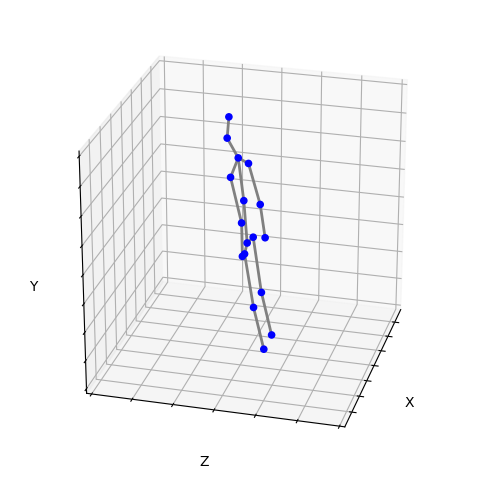

In [140]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

motion_data = np.load('MotionBERT/examples/results/motionbert_unnormal.npy')
frame = 0
val = motion_data[frame]

x = val[:, 0]
y = val[:, 2]
z = val[:, 1] * -1

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color='b', marker='o', label='joints', alpha=1)

ax.plot([x[1], x[2]], [y[1], y[2]], [z[1], z[2]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[2], x[3]], [y[2], y[3]], [z[2], z[3]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[4], x[5]], [y[4], y[5]], [z[4], z[5]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[5], x[6]], [y[5], y[6]], [z[5], z[6]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[0], x[1]], [y[0], y[1]], [z[0], z[1]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[4], x[0]], [y[4], y[0]], [z[4], z[0]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[7], x[0]], [y[7], y[0]], [z[7], z[0]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[7], x[8]], [y[7], y[8]], [z[7], z[8]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[8], x[9]], [y[8], y[9]], [z[8], z[9]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[9], x[10]], [y[9], y[10]], [z[9], z[10]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[8], x[11]], [y[8], y[11]], [z[8], z[11]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[8], x[14]], [y[8], y[14]], [z[8], z[14]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[11], x[12]], [y[11], y[12]], [z[11], z[12]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[12], x[13]], [y[12], y[13]], [z[12], z[13]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[14], x[15]], [y[14], y[15]], [z[14], z[15]], color='gray', linestyle='-', linewidth=2)
ax.plot([x[16], x[15]], [y[16], y[15]], [z[16], z[15]], color='gray', linestyle='-', linewidth=2)

ax.set_xlim([-0.75, 0.75])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1, 1])

ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.view_init(elev=25, azim=15)

plt.show()

In [141]:
file_path = 'AlphaPose/examples/results/alphapose_unnormal.json'
print(file_path)
print()
visual_alpha_result(file_path)

AlphaPose/examples/results/alphapose_unnormal.json

alpha_npdata.shape: (129, 78)
alpha_npmean.shape: (78,)

-------------mean hip-------------
rad: -0.05711477529600509 / abs rad: 0.05711477529600509
deg: -3.2724355722991487 / abs_deg: 3.2724355722991487

----------------mean shoulder----------------
rad: -0.2496581068270001 / abs rad: 0.2496581068270001
deg: -14.30435584241335 / abs_deg: 14.30435584241335

-------------골반 기울기-------------
rad: -0.09066019046792476 / abs rad: 0.09066019046792476
deg: -5.194446283664264 / abs_deg: 5.194446283664264

-------------어깨 기울기-------------
rad: -0.24497869421811996 / abs rad: 0.24497869421811996
deg: -14.036245249324217 / abs_deg: 14.036245249324217


In [142]:
file_path = 'MotionBERT/examples/results/motionbert_unnormal.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motionbert_unnormal.npy

motion data shape: (129, 17, 3)

---------------거북목---------------
rad: -1.2725179336402943 / abs rad: 1.2725179336402943
deg: -72.90990695229743 / abs_deg: 72.90990695229743

-------------골반 기울기-------------
rad: -0.05884672846882429 / abs rad: 0.05884672846882429
deg: -3.371669179415981 / abs_deg: 3.371669179415981

-------------어깨 기울기-------------
rad: -0.2758147456212402 / abs rad: 0.2758147456212402
deg: -15.803020851571466 / abs_deg: 15.803020851571466 

threshold: 25 , middle_data: (79, 17, 3)

---------------mean turtle neck---------------
rad: -1.2474560551035576 / abs rad: 1.2474560551035576
deg: -71.4739670854729 / abs_deg: 71.4739670854729

-------------mean hip-------------
rad: -0.04866046800162735 / abs rad: 0.04866046800162735
deg: -2.7880394456246385 / abs_deg: 2.7880394456246385

-------------mean shoulder-------------
rad: -0.26929184342668594 / abs rad: 0.26929184342668594
deg: -15.429286085646885 / abs_deg: 15.42

In [143]:
file_path = 'AlphaPose/examples/results/alphapose_normal.json'
print(file_path)
print()
visual_alpha_result(file_path)

AlphaPose/examples/results/alphapose_normal.json

alpha_npdata.shape: (145, 78)
alpha_npmean.shape: (78,)

-------------mean hip-------------
rad: 0.0077286414460645365 / abs rad: 0.0077286414460645365
deg: 0.4428185362293834 / abs_deg: 0.4428185362293834

----------------mean shoulder----------------
rad: -0.036960448971771045 / abs rad: 0.036960448971771045
deg: -2.117677734991124 / abs_deg: 2.117677734991124

-------------골반 기울기-------------
rad: 0.0 / abs rad: 0.0
deg: 0.0 / abs_deg: 0.0

-------------어깨 기울기-------------
rad: -0.04995838947911737 / abs rad: 0.04995838947911737
deg: -2.8624048684242007 / abs_deg: 2.8624048684242007


In [144]:
file_path = 'MotionBERT/examples/results/motionbert_normal.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motionbert_normal.npy

motion data shape: (145, 17, 3)

---------------거북목---------------
rad: -1.2926011560177726 / abs rad: 1.2926011560177726
deg: -74.06059083354963 / abs_deg: 74.06059083354963

-------------골반 기울기-------------
rad: 0.004560992006447744 / abs rad: 0.004560992006447744
deg: 0.2613255923623609 / abs_deg: 0.2613255923623609

-------------어깨 기울기-------------
rad: -0.03935005613446208 / abs rad: 0.03935005613446208
deg: -2.254592140107552 / abs_deg: 2.254592140107552 

threshold: 29 , middle_data: (87, 17, 3)

---------------mean turtle neck---------------
rad: -1.2905517138144857 / abs rad: 1.2905517138144857
deg: -73.94316644494529 / abs_deg: 73.94316644494529

-------------mean hip-------------
rad: 0.005243765573135167 / abs rad: 0.005243765573135167
deg: 0.30044563609664426 / abs_deg: 0.30044563609664426

-------------mean shoulder-------------
rad: -0.038658048350390675 / abs rad: 0.038658048350390675
deg: -2.21494301469006 / abs_deg: 2

In [145]:
file_path = 'AlphaPose/examples/results/alphapose_sample1.json'
print(file_path)
print()
visual_alpha_result(file_path)

AlphaPose/examples/results/alphapose_sample1.json

alpha_npdata.shape: (80, 78)
alpha_npmean.shape: (78,)

-------------mean hip-------------
rad: -0.06979061946706953 / abs rad: 0.06979061946706953
deg: -3.998707945066647 / abs_deg: 3.998707945066647

----------------mean shoulder----------------
rad: -0.22006679218968836 / abs rad: 0.22006679218968836
deg: -12.60889840345169 / abs_deg: 12.60889840345169

-------------골반 기울기-------------
rad: 0.0 / abs rad: 0.0
deg: 0.0 / abs_deg: 0.0

-------------어깨 기울기-------------
rad: -0.22347660114063303 / abs rad: 0.22347660114063303
deg: -12.804266065286752 / abs_deg: 12.804266065286752


In [146]:
file_path = 'MotionBERT/examples/results/motionbert_sample1.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motionbert_sample1.npy

motion data shape: (80, 17, 3)

---------------거북목---------------
rad: -1.2084147203806208 / abs rad: 1.2084147203806208
deg: -69.23706337929107 / abs_deg: 69.23706337929107

-------------골반 기울기-------------
rad: -0.031913184612628896 / abs rad: 0.031913184612628896
deg: -1.8284907891254767 / abs_deg: 1.8284907891254767

-------------어깨 기울기-------------
rad: -0.2245943118350053 / abs rad: 0.2245943118350053
deg: -12.86830617079092 / abs_deg: 12.86830617079092 

threshold: 16 , middle_data: (48, 17, 3)

---------------mean turtle neck---------------
rad: -1.2127973777534993 / abs rad: 1.2127973777534993
deg: -69.4881711498089 / abs_deg: 69.4881711498089

-------------mean hip-------------
rad: -0.03478351962024391 / abs rad: 0.03478351962024391
deg: -1.9929488708504681 / abs_deg: 1.9929488708504681

-------------mean shoulder-------------
rad: -0.22734268596277854 / abs rad: 0.22734268596277854
deg: -13.025776408835274 / abs_deg: 13.02

In [147]:
file_path = 'AlphaPose/examples/results/alphapose_sample2.json'
print(file_path)
print()
visual_alpha_result(file_path)

AlphaPose/examples/results/alphapose_sample2.json

alpha_npdata.shape: (88, 78)
alpha_npmean.shape: (78,)

-------------mean hip-------------
rad: -0.08721328657668846 / abs rad: 0.08721328657668846
deg: -4.996953238309205 / abs_deg: 4.996953238309205

----------------mean shoulder----------------
rad: -0.14723029548051664 / abs rad: 0.14723029548051664
deg: -8.435674547497642 / abs_deg: 8.435674547497642

-------------골반 기울기-------------
rad: -0.09966872252275819 / abs rad: 0.09966872252275819
deg: -5.710597150014535 / abs_deg: 5.710597150014535

-------------어깨 기울기-------------
rad: -0.09966863498326284 / abs rad: 0.09966863498326284
deg: -5.710592134370912 / abs_deg: 5.710592134370912


In [148]:
file_path = 'MotionBERT/examples/results/motionbert_sample2.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motionbert_sample2.npy

motion data shape: (88, 17, 3)

---------------거북목---------------
rad: -1.2803451363057106 / abs rad: 1.2803451363057106
deg: -73.35837263041932 / abs_deg: 73.35837263041932

-------------골반 기울기-------------
rad: -0.07317916962069335 / abs rad: 0.07317916962069335
deg: -4.192857567537699 / abs_deg: 4.192857567537699

-------------어깨 기울기-------------
rad: -0.1260734762925144 / abs rad: 0.1260734762925144
deg: -7.223478100103716 / abs_deg: 7.223478100103716 

threshold: 17 , middle_data: (54, 17, 3)

---------------mean turtle neck---------------
rad: -1.2740672049575097 / abs rad: 1.2740672049575097
deg: -72.99867366009454 / abs_deg: 72.99867366009454

-------------mean hip-------------
rad: -0.0638072553725294 / abs rad: 0.0638072553725294
deg: -3.6558864351593825 / abs_deg: 3.6558864351593825

-------------mean shoulder-------------
rad: -0.15551657005637348 / abs rad: 0.15551657005637348
deg: -8.910443108580795 / abs_deg: 8.91044310

In [149]:
file_path = 'AlphaPose/examples/results/alphapose_trans.json'
print(file_path)
print()
visual_alpha_result(file_path)

AlphaPose/examples/results/alphapose_trans.json

alpha_npdata.shape: (76, 78)
alpha_npmean.shape: (78,)

-------------mean hip-------------
rad: 0.050031946490248065 / abs rad: 0.050031946490248065
deg: 2.866619374715586 / abs_deg: 2.866619374715586

----------------mean shoulder----------------
rad: 0.02175252064513546 / abs rad: 0.02175252064513546
deg: 1.2463276267374526 / abs_deg: 1.2463276267374526

-------------골반 기울기-------------
rad: 0.0587556038918514 / abs rad: 0.0587556038918514
deg: 3.3664481257455194 / abs_deg: 3.3664481257455194

-------------어깨 기울기-------------
rad: 0.03997874625699861 / abs rad: 0.03997874625699861
deg: 2.2906134307504575 / abs_deg: 2.2906134307504575


In [150]:
file_path = 'MotionBERT/examples/results/motionbert_trans.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motionbert_trans.npy

motion data shape: (76, 17, 3)

---------------거북목---------------
rad: -1.2569371781465362 / abs rad: 1.2569371781465362
deg: -72.01719542087982 / abs_deg: 72.01719542087982

-------------골반 기울기-------------
rad: 0.031735461688917534 / abs rad: 0.031735461688917534
deg: 1.8183080156740903 / abs_deg: 1.8183080156740903

-------------어깨 기울기-------------
rad: 0.02296865238767469 / abs rad: 0.02296865238767469
deg: 1.3160068429168408 / abs_deg: 1.3160068429168408 

threshold: 15 , middle_data: (46, 17, 3)

---------------mean turtle neck---------------
rad: -1.1353912427454331 / abs rad: 1.1353912427454331
deg: -65.05312630542686 / abs_deg: 65.05312630542686

-------------mean hip-------------
rad: 0.04233439621993919 / abs rad: 0.04233439621993919
deg: 2.4255822316371014 / abs_deg: 2.4255822316371014

-------------mean shoulder-------------
rad: 0.021996232841265867 / abs rad: 0.021996232841265867
deg: 1.2602913069915893 / abs_deg: 1.26029

In [151]:
file_path = 'AlphaPose/examples/results/alphapose_sample3.json'
print(file_path)
print()
visual_alpha_result(file_path)

AlphaPose/examples/results/alphapose_sample3.json

alpha_npdata.shape: (94, 78)
alpha_npmean.shape: (78,)

-------------mean hip-------------
rad: 0.09494128978720476 / abs rad: 0.09494128978720476
deg: 5.439735206335338 / abs_deg: 5.439735206335338

----------------mean shoulder----------------
rad: 0.2729864054383693 / abs rad: 0.2729864054383693
deg: 15.640968896065703 / abs_deg: 15.640968896065703

-------------골반 기울기-------------
rad: 0.09065981916466177 / abs rad: 0.09065981916466177
deg: 5.194425009554376 / abs_deg: 5.194425009554376

-------------어깨 기울기-------------
rad: 0.27829972861016583 / abs rad: 0.27829972861016583
deg: 15.94539988899871 / abs_deg: 15.94539988899871


In [152]:
file_path = 'MotionBERT/examples/results/motionbert_sample3.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motionbert_sample3.npy

motion data shape: (94, 17, 3)

---------------거북목---------------
rad: -1.238260378687179 / abs rad: 1.238260378687179
deg: -70.94709363704644 / abs_deg: 70.94709363704644

-------------골반 기울기-------------
rad: 0.07038634935276201 / abs rad: 0.07038634935276201
deg: 4.032840753246638 / abs_deg: 4.032840753246638

-------------어깨 기울기-------------
rad: 0.27921970573393623 / abs rad: 0.27921970573393623
deg: 15.998110695439339 / abs_deg: 15.998110695439339 

threshold: 18 , middle_data: (58, 17, 3)

---------------mean turtle neck---------------
rad: -1.239576732407569 / abs rad: 1.239576732407569
deg: -71.02251514957112 / abs_deg: 71.02251514957112

-------------mean hip-------------
rad: 0.0720068702331595 / abs rad: 0.0720068702331595
deg: 4.125689760306238 / abs_deg: 4.125689760306238

-------------mean shoulder-------------
rad: 0.2714586493936354 / abs rad: 0.2714586493936354
deg: 15.553434922576852 / abs_deg: 15.553434922576852


In [153]:
file_path = 'AlphaPose/examples/results/alphapose_sample4.json'
print(file_path)
print()
visual_alpha_result(file_path)

AlphaPose/examples/results/alphapose_sample4.json

alpha_npdata.shape: (99, 78)
alpha_npmean.shape: (78,)

-------------mean hip-------------
rad: -0.05487097625007288 / abs rad: 0.05487097625007288
deg: -3.1438753568917526 / abs_deg: 3.1438753568917526

----------------mean shoulder----------------
rad: -0.33003688469945786 / abs rad: 0.33003688469945786
deg: -18.90972057692471 / abs_deg: 18.90972057692471

-------------골반 기울기-------------
rad: -0.09065997486254798 / abs rad: 0.09065997486254798
deg: -5.194433930386134 / abs_deg: 5.194433930386134

-------------어깨 기울기-------------
rad: -0.3366748372509963 / abs rad: 0.3366748372509963
deg: -19.29004724273596 / abs_deg: 19.29004724273596


In [154]:
file_path = 'MotionBERT/examples/results/motionbert_sample4.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motionbert_sample4.npy

motion data shape: (99, 17, 3)

---------------거북목---------------
rad: -1.163832447017586 / abs rad: 1.163832447017586
deg: -66.68268727449068 / abs_deg: 66.68268727449068

-------------골반 기울기-------------
rad: -0.027580749285808188 / abs rad: 0.027580749285808188
deg: -1.5802605298852686 / abs_deg: 1.5802605298852686

-------------어깨 기울기-------------
rad: -0.3319034930497446 / abs rad: 0.3319034930497446
deg: -19.016669357400016 / abs_deg: 19.016669357400016 

threshold: 19 , middle_data: (61, 17, 3)

---------------mean turtle neck---------------
rad: -1.1685861555857064 / abs rad: 1.1685861555857064
deg: -66.95505471247915 / abs_deg: 66.95505471247915

-------------mean hip-------------
rad: -0.03519107193496881 / abs rad: 0.03519107193496881
deg: -2.0162998984149922 / abs_deg: 2.0162998984149922

-------------mean shoulder-------------
rad: -0.3508583593607593 / abs rad: 0.3508583593607593
deg: -20.10270319825587 / abs_deg: 20.102

In [155]:
file_path = 'AlphaPose/examples/results/alphapose_1.json'
print(file_path)
print()
visual_alpha_result(file_path)

AlphaPose/examples/results/alphapose_1.json

alpha_npdata.shape: (70, 78)
alpha_npmean.shape: (78,)

-------------mean hip-------------
rad: -0.0010429398754844429 / abs rad: 0.0010429398754844429
deg: -0.059756053151158166 / abs_deg: 0.059756053151158166

----------------mean shoulder----------------
rad: 0.07021277320750564 / abs rad: 0.07021277320750564
deg: 4.022895572699297 / abs_deg: 4.022895572699297

-------------골반 기울기-------------
rad: 0.0 / abs rad: 0.0
deg: 0.0 / abs_deg: 0.0

-------------어깨 기울기-------------
rad: 0.09495166710046685 / abs rad: 0.09495166710046685
deg: 5.440329782587941 / abs_deg: 5.440329782587941


In [156]:
file_path = 'MotionBERT/examples/results/motion_1.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motion_1.npy

motion data shape: (70, 17, 3)

---------------거북목---------------
rad: -1.1901820912791032 / abs rad: 1.1901820912791032
deg: -68.19241068234672 / abs_deg: 68.19241068234672

-------------골반 기울기-------------
rad: -0.011953783801078033 / abs rad: 0.011953783801078033
deg: -0.6849013610136221 / abs_deg: 0.6849013610136221

-------------어깨 기울기-------------
rad: 0.08698816014441024 / abs rad: 0.08698816014441024
deg: 4.984054443882825 / abs_deg: 4.984054443882825 

threshold: 14 , middle_data: (42, 17, 3)

---------------mean turtle neck---------------
rad: -1.2108588295687686 / abs rad: 1.2108588295687686
deg: -69.37710052044109 / abs_deg: 69.37710052044109

-------------mean hip-------------
rad: -0.006314894948585785 / abs rad: 0.006314894948585785
deg: -0.3618168286224485 / abs_deg: 0.3618168286224485

-------------mean shoulder-------------
rad: 0.07851422061708713 / abs rad: 0.07851422061708713
deg: 4.498533473118126 / abs_deg: 4.498533473118

In [157]:
file_path = 'AlphaPose/examples/results/alphapose_2.json'
print(file_path)
print()
visual_alpha_result(file_path)

AlphaPose/examples/results/alphapose_2.json

alpha_npdata.shape: (88, 78)
alpha_npmean.shape: (78,)

-------------mean hip-------------
rad: 0.0037939896776599956 / abs rad: 0.0037939896776599956
deg: 0.21737959604611737 / abs_deg: 0.21737959604611737

----------------mean shoulder----------------
rad: -0.04591025791587451 / abs rad: 0.04591025791587451
deg: -2.6304640149366887 / abs_deg: 2.6304640149366887

-------------골반 기울기-------------
rad: -0.09065994103802699 / abs rad: 0.09065994103802699
deg: -5.194431992383838 / abs_deg: 5.194431992383838

-------------어깨 기울기-------------
rad: -0.05258308429100846 / abs rad: 0.05258308429100846
deg: -3.012788803655444 / abs_deg: 3.012788803655444


In [158]:
file_path = 'MotionBERT/examples/results/motion_2.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motion_2.npy

motion data shape: (88, 17, 3)

---------------거북목---------------
rad: -0.7297895861905701 / abs rad: 0.7297895861905701
deg: -41.81386322131849 / abs_deg: 41.81386322131849

-------------골반 기울기-------------
rad: -0.016737260108860383 / abs rad: 0.016737260108860383
deg: -0.9589743648503728 / abs_deg: 0.9589743648503728

-------------어깨 기울기-------------
rad: -0.007276399871402013 / abs rad: 0.007276399871402013
deg: -0.41690700268087033 / abs_deg: 0.41690700268087033 

threshold: 17 , middle_data: (54, 17, 3)

---------------mean turtle neck---------------
rad: -1.2003004429395245 / abs rad: 1.2003004429395245
deg: -68.77214952811805 / abs_deg: 68.77214952811805

-------------mean hip-------------
rad: -0.048773450684001615 / abs rad: 0.048773450684001615
deg: -2.794512876482751 / abs_deg: 2.794512876482751

-------------mean shoulder-------------
rad: 0.020191567232093626 / abs rad: 0.020191567232093626
deg: 1.1568915841536143 / abs_deg: 1.156

In [159]:
file_path = 'AlphaPose/examples/results/alphapose_side_2.json'
print(file_path)
print()
visual_alpha_result(file_path)

AlphaPose/examples/results/alphapose_side_2.json

alpha_npdata.shape: (101, 78)
alpha_npmean.shape: (78,)

-------------mean hip-------------
rad: 1.993882666807478 / abs rad: 1.993882666807478
deg: 114.24106165235784 / abs_deg: 114.24106165235784

----------------mean shoulder----------------
rad: 2.6662866187531917 / abs rad: 2.6662866187531917
deg: 152.76697022676467 / abs_deg: 152.76697022676467

-------------골반 기울기-------------
rad: 1.5707963267948966 / abs rad: 1.5707963267948966
deg: 90.0 / abs_deg: 90.0

-------------어깨 기울기-------------
rad: 3.141592653589793 / abs rad: 3.141592653589793
deg: 180.0 / abs_deg: 180.0


In [160]:
file_path = 'MotionBERT/examples/results/motion_front.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motion_front.npy

motion data shape: (75, 17, 3)

---------------거북목---------------
rad: -1.2279162563780968 / abs rad: 1.2279162563780968
deg: -70.3544190859689 / abs_deg: 70.3544190859689

-------------골반 기울기-------------
rad: 0.021075290062405133 / abs rad: 0.021075290062405133
deg: 1.2075251725898195 / abs_deg: 1.2075251725898195

-------------어깨 기울기-------------
rad: 0.005376488322961985 / abs rad: 0.005376488322961985
deg: 0.3080500895070916 / abs_deg: 0.3080500895070916 

threshold: 15 , middle_data: (45, 17, 3)

---------------mean turtle neck---------------
rad: -1.222868642199275 / abs rad: 1.222868642199275
deg: -70.06521209691202 / abs_deg: 70.06521209691202

-------------mean hip-------------
rad: 0.03199056992752154 / abs rad: 0.03199056992752154
deg: 1.8329246410651163 / abs_deg: 1.8329246410651163

-------------mean shoulder-------------
rad: 0.009153182063609138 / abs rad: 0.009153182063609138
deg: 0.524438701359649 / abs_deg: 0.524438701359

In [161]:
file_path = 'MotionBERT/examples/results/motion_side.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motion_side.npy

motion data shape: (101, 17, 3)

---------------거북목---------------
rad: -1.0041533106614584 / abs rad: 1.0041533106614584
deg: -57.53374668499058 / abs_deg: 57.53374668499058

-------------골반 기울기-------------
rad: 0.0762577576937966 / abs rad: 0.0762577576937966
deg: 4.3692476709858274 / abs_deg: 4.3692476709858274

-------------어깨 기울기-------------
rad: -0.010826727322422493 / abs rad: 0.010826727322422493
deg: -0.6203257815137833 / abs_deg: 0.6203257815137833 

threshold: 20 , middle_data: (61, 17, 3)

---------------mean turtle neck---------------
rad: -0.9968238242250491 / abs rad: 0.9968238242250491
deg: -57.11379804618595 / abs_deg: 57.11379804618595

-------------mean hip-------------
rad: 0.06470435908676525 / abs rad: 0.06470435908676525
deg: 3.7072866917706064 / abs_deg: 3.7072866917706064

-------------mean shoulder-------------
rad: -0.007483283364770929 / abs rad: 0.007483283364770929
deg: -0.42876055370183197 / abs_deg: 0.428760

In [162]:
file_path = 'MotionBERT/examples/results/motion_9999.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motion_9999.npy

motion data shape: (91, 17, 3)

---------------거북목---------------
rad: -1.2806753502292534 / abs rad: 1.2806753502292534
deg: -73.37729249457479 / abs_deg: 73.37729249457479

-------------골반 기울기-------------
rad: -0.004586841211157784 / abs rad: 0.004586841211157784
deg: -0.2628066426960159 / abs_deg: 0.2628066426960159

-------------어깨 기울기-------------
rad: -0.006351017696403866 / abs rad: 0.006351017696403866
deg: -0.36388650961683994 / abs_deg: 0.36388650961683994 

threshold: 18 , middle_data: (55, 17, 3)

---------------mean turtle neck---------------
rad: -1.2921252739228715 / abs rad: 1.2921252739228715
deg: -74.03332479796595 / abs_deg: 74.03332479796595

-------------mean hip-------------
rad: -0.010438847621328995 / abs rad: 0.010438847621328995
deg: -0.59810191168233 / abs_deg: 0.59810191168233

-------------mean shoulder-------------
rad: -0.01292579013362528 / abs rad: 0.01292579013362528
deg: -0.740593221528569 / abs_deg: 0.740

In [163]:
file_path = 'MotionBERT/examples/results/motion_8888.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motion_8888.npy

motion data shape: (110, 17, 3)

---------------거북목---------------
rad: -1.0852892526144957 / abs rad: 1.0852892526144957
deg: -62.182493725718054 / abs_deg: 62.182493725718054

-------------골반 기울기-------------
rad: -0.04659601174813256 / abs rad: 0.04659601174813256
deg: -2.669754815309997 / abs_deg: 2.669754815309997

-------------어깨 기울기-------------
rad: 0.07698990994523805 / abs rad: 0.07698990994523805
deg: 4.411196904954424 / abs_deg: 4.411196904954424 

threshold: 22 , middle_data: (66, 17, 3)

---------------mean turtle neck---------------
rad: -1.0912111469056374 / abs rad: 1.0912111469056374
deg: -62.52179327532308 / abs_deg: 62.52179327532308

-------------mean hip-------------
rad: -0.04347236593558822 / abs rad: 0.04347236593558822
deg: -2.4907830935574933 / abs_deg: 2.4907830935574933

-------------mean shoulder-------------
rad: 0.1024267517461597 / abs rad: 0.1024267517461597
deg: 5.868620584289186 / abs_deg: 5.86862058428918

In [215]:
file_path = 'AlphaPose/examples/results/alphapose_small_side.json'
print(file_path)
print()
visual_alpha_result(file_path)

AlphaPose/examples/results/alphapose_small_side.json

alpha_npdata.shape: (122, 78)
alpha_npmean.shape: (78,)

-------------mean hip-------------
rad: -0.4343356798602891 / abs rad: 0.4343356798602891
deg: -24.885601347939836 / abs_deg: 24.885601347939836

----------------mean shoulder----------------
rad: -1.3898520034870032 / abs rad: 1.3898520034870032
deg: -79.63265394760705 / abs_deg: 79.63265394760705

-------------골반 기울기-------------
rad: -0.46364817827005794 / abs rad: 0.46364817827005794
deg: -26.565083793803527 / abs_deg: 26.565083793803527

-------------어깨 기울기-------------
rad: -0.7853981633974483 / abs rad: 0.7853981633974483
deg: -45.0 / abs_deg: 45.0


In [216]:
file_path = 'MotionBERT/examples/results/motion_small_side.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motion_small_side.npy

motion data shape: (122, 17, 3)

---------------거북목---------------
rad: -1.2257860684211674 / abs rad: 1.2257860684211674
deg: -70.23236830646725 / abs_deg: 70.23236830646725

-------------골반 기울기-------------
rad: -0.0839522375597415 / abs rad: 0.0839522375597415
deg: -4.810108892852858 / abs_deg: 4.810108892852858

-------------어깨 기울기-------------
rad: -0.017054558723584 / abs rad: 0.017054558723584
deg: -0.9771542363193836 / abs_deg: 0.9771542363193836 

threshold: 24 , middle_data: (74, 17, 3)

---------------mean turtle neck---------------
rad: -1.2184040373665594 / abs rad: 1.2184040373665594
deg: -69.80940908280371 / abs_deg: 69.80940908280371

-------------mean hip-------------
rad: -0.07704135940512409 / abs rad: 0.07704135940512409
deg: -4.4141447418641215 / abs_deg: 4.4141447418641215

-------------mean shoulder-------------
rad: -0.03664980513654271 / abs rad: 0.03664980513654271
deg: -2.099879154300783 / abs_deg: 2.09987915

In [164]:
def extract_frame(video_path, frame_number=0):
    # 비디오 파일 열기
    cap = cv2.VideoCapture(video_path)

    # 파일이 열렸는지 확인
    if not cap.isOpened():
        print("Error: Could not open video.")
        return None

    # 특정 프레임으로 이동
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        print(f"Error: Could not read frame {frame_number}.")
        return None

    # 비디오 파일 닫기
    cap.release()

    return frame

In [192]:
origin_path = 'AlphaPose/examples/video/unnormal.mp4'
alpha_path = 'AlphaPose/examples/results/AlphaPose_unnormal.mp4'
motion_path = 'MotionBERT/examples/results/motionbert_unnormal.mp4'
mesh_path = 'MotionBERT/examples/results/motionbert_mesh_unnormal.mp4'
normal_path = 'AlphaPose/examples/results/AlphaPose_normal.mp4'
trans_path = 'AlphaPose/examples/results/AlphaPose_trans.mp4'
sample1_path = 'AlphaPose/examples/results/AlphaPose_sample1.mp4'
sample2_path = 'AlphaPose/examples/results/AlphaPose_sample2.mp4'
sample3_path = 'AlphaPose/examples/results/AlphaPose_sample3.mp4'
sample4_path = 'AlphaPose/examples/results/AlphaPose_sample4.mp4'
vi1_path = 'AlphaPose/examples/results/AlphaPose_1.mp4'
vi2_path = 'AlphaPose/examples/results/AlphaPose_2.mp4'
side_path = 'AlphaPose/examples/results/AlphaPose_side_2.mp4'
front_path = 'MotionBERT/examples/results/motion_front.mp4'
kinovea_path = 'visualexample/side_22.mkv'
motion_side_path = 'MotionBERT/examples/results/motion_side.mp4'
origin_path1 = 'AlphaPose/examples/video/normal.mp4'
origin_path2 = 'AlphaPose/examples/video/1.mp4'
origin_path3 = 'AlphaPose/examples/video/sample1.mp4'
origin_path4 = 'AlphaPose/examples/video/sample3.mp4'
origin_path5 = 'AlphaPose/examples/video/sample4.mp4'
asdf_path5 = 'AlphaPose/examples/results/AlphaPose_8888.mp4'
asdf_path1 = 'AlphaPose/examples/results/AlphaPose_small_front.mp4'
asdf_path2 = 'AlphaPose/examples/results/AlphaPose_small_side.mp4'
path_list = [origin_path, alpha_path, motion_path, mesh_path, normal_path, trans_path, sample1_path, sample2_path, sample3_path, sample4_path, vi1_path, vi2_path, side_path,
             front_path, kinovea_path, motion_side_path, origin_path1, origin_path2, origin_path3, origin_path4, origin_path5, asdf_path5, asdf_path1, asdf_path2]

frame_number = 0 # len(motion_data) // 2  # middle frame of video
print("frame number:", frame_number)

for i in range(len(path_list)):
    frame = extract_frame(path_list[i], frame_number)

    if frame is not None:
        # 프레임을 이미지 파일로 저장
        cv2.imwrite(f'visualexample/{i}.jpg', frame)
        print(f"Frame extracted and saved as visualexample/{i}.jpg.")

frame number: 0
Frame extracted and saved as visualexample/0.jpg.
Frame extracted and saved as visualexample/1.jpg.
Frame extracted and saved as visualexample/2.jpg.
Frame extracted and saved as visualexample/3.jpg.
Frame extracted and saved as visualexample/4.jpg.
Frame extracted and saved as visualexample/5.jpg.
Frame extracted and saved as visualexample/6.jpg.
Frame extracted and saved as visualexample/7.jpg.
Frame extracted and saved as visualexample/8.jpg.
Frame extracted and saved as visualexample/9.jpg.
Frame extracted and saved as visualexample/10.jpg.
Frame extracted and saved as visualexample/11.jpg.
Frame extracted and saved as visualexample/12.jpg.
Frame extracted and saved as visualexample/13.jpg.
Frame extracted and saved as visualexample/14.jpg.
Frame extracted and saved as visualexample/15.jpg.
Frame extracted and saved as visualexample/16.jpg.
Frame extracted and saved as visualexample/17.jpg.
Frame extracted and saved as visualexample/18.jpg.
Frame extracted and saved

In [166]:
def draw_keypoints_and_angle(image_path):
    # 이미지를 읽음
    image = cv2.imread(image_path)

    # 어깨 각도 그리기
    height, width, _ = image.shape
    start_point_horizontal = (0, int(alpha_frame[19]))
    end_point_horizontal = (width, int(alpha_frame[19]))
    cv2.line(image, start_point_horizontal, end_point_horizontal, (0, 0, 255), 2)
    cv2.line(image, (int(alpha_frame[18]), int(alpha_frame[19])), (int(alpha_frame[15]), int(alpha_frame[16])), (0, 0, 255), 2)
    
    angle_text = f"degree: {abs(shoulder_rad*180)/math.pi:.2f}"
    text_position = (int(alpha_frame[18]) + 10, int(alpha_frame[19]) + 25)
    cv2.putText(image, angle_text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # 골반 각도 그리기
    height, width, _ = image.shape
    start_point_horizontal = (0, int(alpha_frame[37]))
    end_point_horizontal = (width, int(alpha_frame[37]))
    cv2.line(image, start_point_horizontal, end_point_horizontal, (0, 0, 255), 2)
    cv2.line(image, (int(alpha_frame[36]), int(alpha_frame[37])), (int(alpha_frame[33]), int(alpha_frame[34])), (0, 0, 255), 2)
    
    angle_text = f"degree: {abs(hip_rad*180)/math.pi:.2f}"
    text_position = (int(alpha_frame[36]) + 10, int(alpha_frame[37]) + 25)
    cv2.putText(image, angle_text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2.imwrite('visualexample/1.jpg', image)

image_path = f'visualexample/1.jpg'
alpha_frame = alpha_data[frame_number]['keypoints']


draw_keypoints_and_angle(image_path)

NameError: name 'shoulder_rad' is not defined

In [ ]:
def resize_and_concatenate(images):
    # 첫 번째 이미지의 크기를 기준으로 삼기
    base_image = cv2.imread(images[0])
    base_height, base_width = base_image.shape[:2]

    resized_images = []
    
    for image_path in images:
        # 이미지 읽기
        image = cv2.imread(image_path)
        
        # 이미지 리사이즈
        resized_image = cv2.resize(image, (base_width, base_height))
        resized_images.append(resized_image)
    
    # 이미지들을 일렬로 연결
    concatenated_image = np.hstack(resized_images)
    
    return concatenated_image

# 사용 예제
image_paths = [
    'visualexample/0.jpg',
    'visualexample/draw.jpg',
    'visualexample/2.jpg',
    'visualexample/3.jpg'
]

result_image = resize_and_concatenate(image_paths)

# 결과 이미지 저장 및 표시
output_path = 'visualexample/merge.jpg'
cv2.imwrite(output_path, result_image)
print("Done!")

[ WARN:0@529747.281] global loadsave.cpp:248 findDecoder imread_('visualexample/draw.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


No handles with labels found to put in legend.


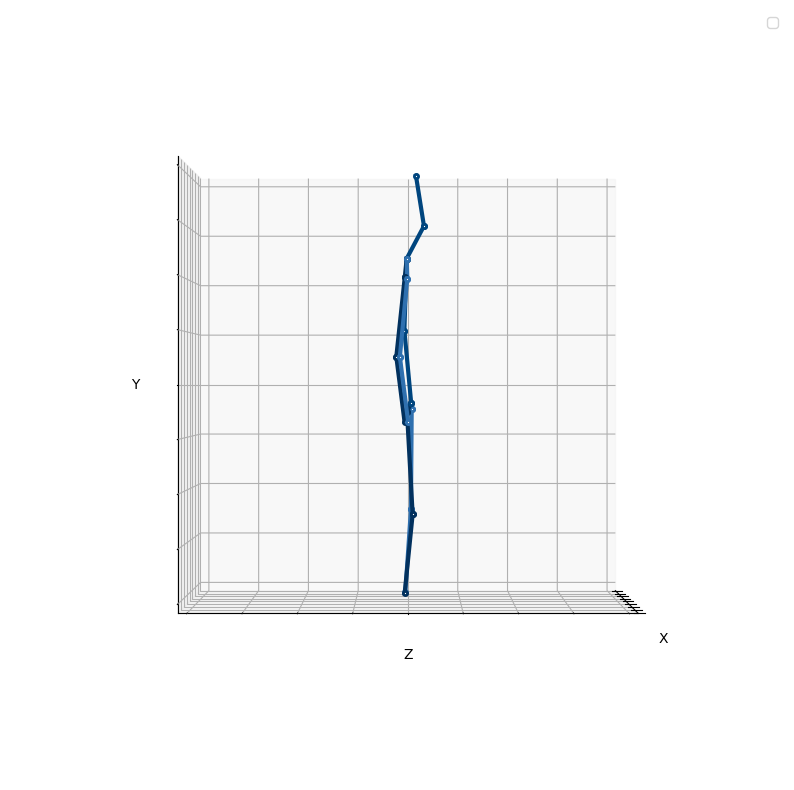

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def rotate_keypoints_y(j3d, angle_degrees):
    """ Rotate keypoints around the Y-axis to ensure upright posture. """
    angle_radians = np.deg2rad(angle_degrees)
    rotation_matrix = np.array([
        [1, 0, 0],  # X-coordinates remain the same
        [0, np.cos(angle_radians), -np.sin(angle_radians)],  # Rotation on YZ plane
        [0, np.sin(angle_radians), np.cos(angle_radians)]
    ])
    return np.dot(j3d, rotation_matrix.T)

# Load the motion data
motion = np.load('MotionBERT/examples/results/motion_front.npy')

# Define joint pairs
joint_pairs = [[0, 1], [1, 2], [2, 3], [0, 4], [4, 5], [5, 6], [0, 7], [7, 8], [8, 9], [8, 11], [8, 14], [9, 10], [11, 12], [12, 13], [14, 15], [15, 16]]
joint_pairs_left = [[8, 11], [11, 12], [12, 13], [0, 4], [4, 5], [5, 6]]
joint_pairs_right = [[8, 14], [14, 15], [15, 16], [0, 1], [1, 2], [2, 3]]

# Define colors
color_mid = "#00457E"
color_left = "#02315E"
color_right = "#2F70AF"

# Get the first frame of motion data
j3d = motion[0]

# Calculate the center of the keypoints
center_x = np.mean(j3d[:, 0])
center_y = np.mean(j3d[:, 1])
center_z = np.mean(j3d[:, 2])

# Shift the keypoints to center them around the origin
j3d_centered = j3d - np.array([center_x, center_y, center_z])

# Rotate the keypoints around the Y-axis
# Adjust the angle as necessary to tilt the person
# change this value to the desired tilt angle
j3d_rotated = rotate_keypoints_y(j3d_centered, 167)

# Create the plot
fig = plt.figure(0, figsize=(10, 10))
ax = plt.axes(projection="3d")

# Set the axis limits dynamically
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')

# Set the view angle
# ax.view_init(elev=0., azim=-90)
ax.view_init(elev=0., azim=0)

# Remove the tick labels
plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

# Plot each limb
for i in range(len(joint_pairs)):
    limb = joint_pairs[i]
    xs, ys, zs = [np.array([j3d_rotated[limb[0], j], j3d_rotated[limb[1], j]]) for j in range(3)]
    if joint_pairs[i] in joint_pairs_left:
        ax.plot(xs, zs, ys, color=color_left, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)
    elif joint_pairs[i] in joint_pairs_right:
        ax.plot(xs, zs, ys, color=color_right, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)
    else:
        ax.plot(xs, zs, ys, color=color_mid, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)
plt.legend()
plt.show()

In [ ]:
file_path = 'MotionBERT/examples/results/motion_front.npy'
print(file_path)
print()
visual_motion_result(file_path)

MotionBERT/examples/results/motion_front.npy

motion data shape: (75, 17, 3)

---------------거북목---------------
rad: -1.2279162563780968 / abs rad: 1.2279162563780968
deg: -70.3544190859689 / abs_deg: 70.3544190859689

-------------골반 기울기-------------
rad: 0.021075290062405133 / abs rad: 0.021075290062405133
deg: 1.2075251725898195 / abs_deg: 1.2075251725898195

-------------어깨 기울기-------------
rad: 0.005376488322961985 / abs rad: 0.005376488322961985
deg: 0.3080500895070916 / abs_deg: 0.3080500895070916 

threshold: 15 , middle_data: (45, 17, 3)

---------------mean turtle neck---------------
rad: -1.222868642199275 / abs rad: 1.222868642199275
deg: -70.06521209691202 / abs_deg: 70.06521209691202

-------------mean hip-------------
rad: 0.03199056992752154 / abs rad: 0.03199056992752154
deg: 1.8329246410651163 / abs_deg: 1.8329246410651163

-------------mean shoulder-------------
rad: 0.009153182063609138 / abs rad: 0.009153182063609138
deg: 0.524438701359649 / abs_deg: 0.524438701359

No handles with labels found to put in legend.


threshold: 15 , middle_data: (45, 17, 3)
rad: -1.4379522372253903 / abs rad: 1.4379522372253903
deg: -82.38859433440942 / abs_deg: 82.38859433440942


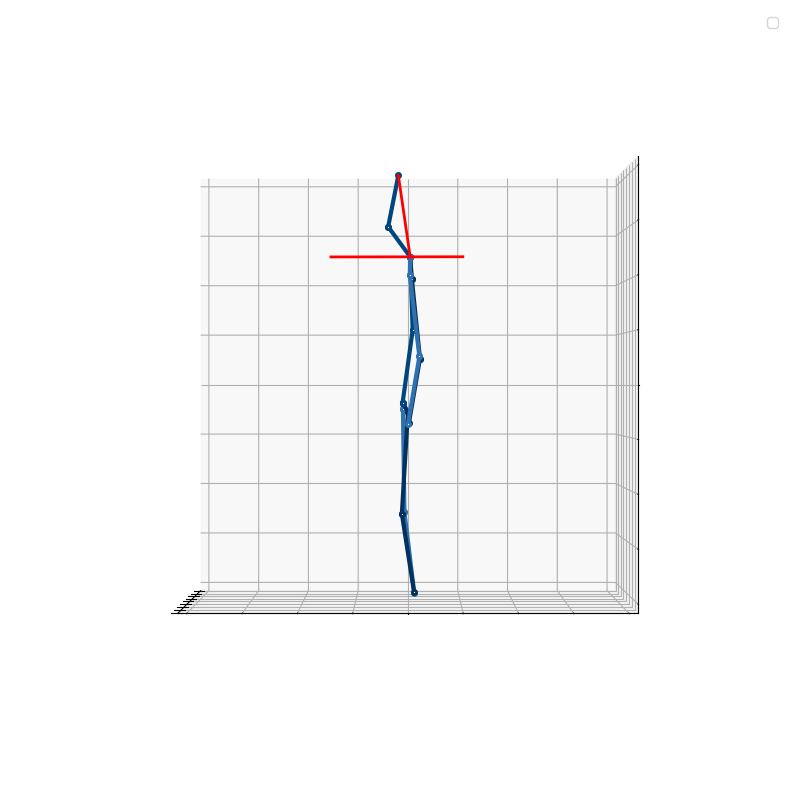

In [190]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def rotate_keypoints_y(j3d, angle_degrees):
    """ Rotate keypoints around the Y-axis to ensure upright posture. """
    angle_radians = np.deg2rad(angle_degrees)
    rotation_matrix = np.array([
        [1, 0, 0],  # X-coordinates remain the same
        [0, np.cos(angle_radians), -np.sin(angle_radians)],  # Rotation on YZ plane
        [0, np.sin(angle_radians), np.cos(angle_radians)]
    ])
    return np.dot(j3d, rotation_matrix.T)

# Load the motion data
motion = np.load('MotionBERT/examples/results/motion_front.npy')

# Define joint pairs
joint_pairs = [[0, 1], [1, 2], [2, 3], [0, 4], [4, 5], [5, 6], [0, 7], [7, 8], [8, 9], [8, 11], [8, 14], [9, 10], [11, 12], [12, 13], [14, 15], [15, 16]]
joint_pairs_left = [[8, 11], [11, 12], [12, 13], [0, 4], [4, 5], [5, 6]]
joint_pairs_right = [[8, 14], [14, 15], [15, 16], [0, 1], [1, 2], [2, 3]]

# Define colors
color_mid = "#00457E"
color_left = "#02315E"
color_right = "#2F70AF"

# # Get the first frame of motion data
copyed_data = motion.copy()
data_len = len(copyed_data)
threshold = int(data_len * 0.2)
middle_data = copyed_data[threshold:data_len-threshold]
print("threshold:", threshold, ", middle_data:", middle_data.shape)
mean_data = np.mean(middle_data, axis=0)
j3d = mean_data.copy()

# j3d = motion[0]

# Calculate the center of the keypoints
center_x = np.mean(j3d[:, 0])
center_y = np.mean(j3d[:, 1])
center_z = np.mean(j3d[:, 2])

# Shift the keypoints to center them around the origin
j3d_centered = j3d - np.array([center_x, center_y, center_z])

# Rotate the keypoints around the Y-axis
# Adjust the angle as necessary to tilt the person
# change this value to the desired tilt angle
j3d_rotated = rotate_keypoints_y(j3d_centered, 167)

# Create the plot
fig = plt.figure(0, figsize=(10, 10))
ax = plt.axes(projection="3d")

# Set the axis limits dynamically
ax.set_xlim(-1, 1)
ax.set_ylim(-0.8, 0.8)
ax.set_zlim(-1, 1)

# Set the axis labels
# ax.set_xlabel('X')
# ax.set_ylabel('Z')
# ax.set_zlabel('Y')

# Set the view angle
# ax.view_init(elev=0., azim=-90)
ax.view_init(elev=0., azim=-180)

# Remove the tick labels
plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

# Plot each limb
for i in range(len(joint_pairs)):
    limb = joint_pairs[i]
    xs, ys, zs = [np.array([j3d_rotated[limb[0], j], j3d_rotated[limb[1], j]]) for j in range(3)]
    if joint_pairs[i] in joint_pairs_left:
        ax.plot(xs, zs, ys, color=color_left, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)
    elif joint_pairs[i] in joint_pairs_right:
        ax.plot(xs, zs, ys, color=color_right, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)
    else:
        ax.plot(xs, zs, ys, color=color_mid, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)

ax.plot([j3d_rotated[8, 0], j3d_rotated[10, 0]], [j3d_rotated[8, 2], j3d_rotated[10, 2]], [j3d_rotated[8, 1], j3d_rotated[10, 1]], color='r', lw=2)
ax.plot([j3d_rotated[8, 0], j3d_rotated[10, 0]], [j3d_rotated[8, 2]*25, j3d_rotated[10, 2]*8], [j3d_rotated[8, 1], j3d_rotated[8, 1]], color='r', lw=2)

tutle_xz = cal_2d_distance(j3d_rotated[8, 0], j3d_rotated[8, 2], j3d_rotated[10, 0], j3d_rotated[10, 2])
turtle_rad_3dm = math.atan2(j3d_rotated[8, 1] - j3d_rotated[10, 1], tutle_xz)
turtle_deg_3dm = (turtle_rad_3dm*180)/math.pi
print("rad:", turtle_rad_3dm, "/ abs rad:", abs(turtle_rad_3dm))
print("deg:", turtle_deg_3dm, "/ abs_deg:", abs(turtle_deg_3dm))

plt.legend()
plt.show()

No handles with labels found to put in legend.


threshold: 20 , middle_data: (61, 17, 3)
rad: -1.0713586100988777 / abs rad: 1.0713586100988777
deg: -61.384326703667625 / abs_deg: 61.384326703667625


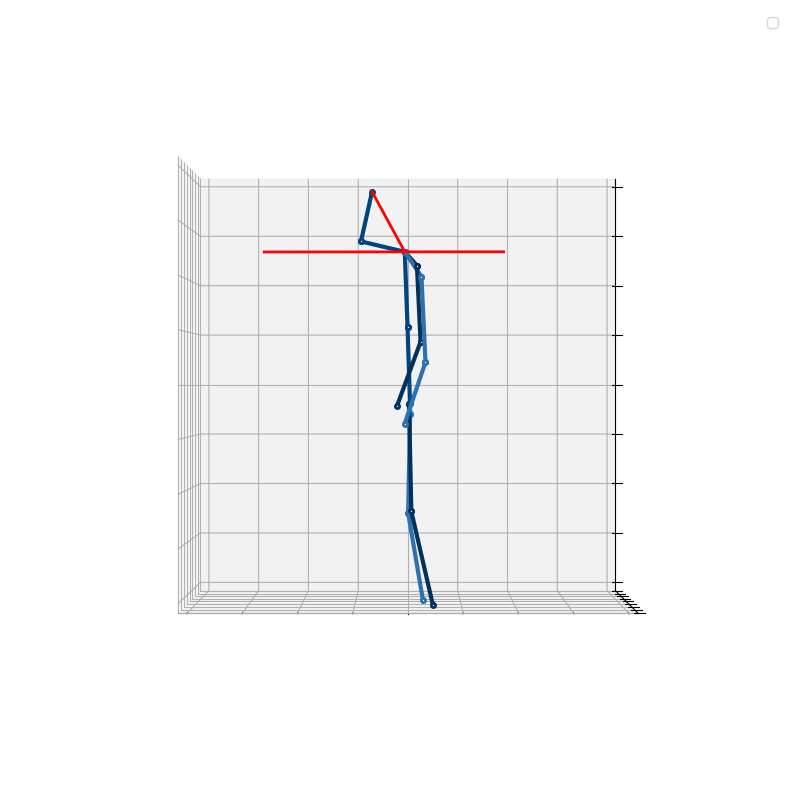

In [186]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def rotate_keypoints_y(j3d, angle_degrees):
    """ Rotate keypoints around the Y-axis to ensure upright posture. """
    angle_radians = np.deg2rad(angle_degrees)
    rotation_matrix = np.array([
        [1, 0, 0],  # X-coordinates remain the same
        [0, np.cos(angle_radians), -np.sin(angle_radians)],  # Rotation on YZ plane
        [0, np.sin(angle_radians), np.cos(angle_radians)]
    ])
    return np.dot(j3d, rotation_matrix.T)

# Load the motion data
motion = np.load('MotionBERT/examples/results/motion_side.npy')

# Define joint pairs
joint_pairs = [[0, 1], [1, 2], [2, 3], [0, 4], [4, 5], [5, 6], [0, 7], [7, 8], [8, 9], [8, 11], [8, 14], [9, 10], [11, 12], [12, 13], [14, 15], [15, 16]]
joint_pairs_left = [[8, 11], [11, 12], [12, 13], [0, 4], [4, 5], [5, 6]]
joint_pairs_right = [[8, 14], [14, 15], [15, 16], [0, 1], [1, 2], [2, 3]]

# Define colors
color_mid = "#00457E"
color_left = "#02315E"
color_right = "#2F70AF"

# # Get the first frame of motion data
copyed_data = motion.copy()
data_len = len(copyed_data)
threshold = int(data_len * 0.2)
middle_data = copyed_data[threshold:data_len-threshold]
print("threshold:", threshold, ", middle_data:", middle_data.shape)
mean_data = np.mean(middle_data, axis=0)
j3d = mean_data.copy()

# j3d = motion[0]

# Calculate the center of the keypoints
center_x = np.mean(j3d[:, 0])
center_y = np.mean(j3d[:, 1])
center_z = np.mean(j3d[:, 2])

# Shift the keypoints to center them around the origin
j3d_centered = j3d - np.array([center_x, center_y, center_z])

# Rotate the keypoints around the Y-axis
# Adjust the angle as necessary to tilt the person
# change this value to the desired tilt angle
j3d_rotated = rotate_keypoints_y(j3d_centered, 167)

# Create the plot
fig = plt.figure(0, figsize=(10, 10))
ax = plt.axes(projection="3d")

# Set the axis limits dynamically
ax.set_xlim(-1, 1)
ax.set_ylim(-0.8, 0.8)
ax.set_zlim(-1, 1)

# Set the axis labels
# ax.set_xlabel('X')
# ax.set_ylabel('Z')
# ax.set_zlabel('Y')

# Set the view angle
# ax.view_init(elev=0., azim=-90)
ax.view_init(elev=0., azim=-90)

# Remove the tick labels
plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

# Plot each limb
for i in range(len(joint_pairs)):
    limb = joint_pairs[i]
    xs, ys, zs = [np.array([j3d_rotated[limb[0], j], j3d_rotated[limb[1], j]]) for j in range(3)]
    if joint_pairs[i] in joint_pairs_left:
        ax.plot(xs, zs, ys, color=color_left, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)
    elif joint_pairs[i] in joint_pairs_right:
        ax.plot(xs, zs, ys, color=color_right, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)
    else:
        ax.plot(xs, zs, ys, color=color_mid, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)

ax.plot([j3d_rotated[8, 0], j3d_rotated[10, 0]], [j3d_rotated[8, 2], j3d_rotated[10, 2]], [j3d_rotated[8, 1], j3d_rotated[10, 1]], color='r', lw=2)
ax.plot([j3d_rotated[8, 0]*-30, j3d_rotated[10, 0]*4], [j3d_rotated[8, 2], j3d_rotated[10, 2]], [j3d_rotated[8, 1], j3d_rotated[8, 1]], color='r', lw=2)

tutle_xz = cal_2d_distance(j3d_rotated[8, 0], j3d_rotated[8, 2], j3d_rotated[10, 0], j3d_rotated[10, 2])
turtle_rad_3dm = math.atan2(j3d_rotated[8, 1] - j3d_rotated[10, 1], tutle_xz)
turtle_deg_3dm = (turtle_rad_3dm*180)/math.pi
print("rad:", turtle_rad_3dm, "/ abs rad:", abs(turtle_rad_3dm))
print("deg:", turtle_deg_3dm, "/ abs_deg:", abs(turtle_deg_3dm))

plt.legend()
plt.show()

No handles with labels found to put in legend.


threshold: 24 , middle_data: (74, 17, 3)
rad: -1.3593730594625382 / abs rad: 1.3593730594625382
deg: -77.88633909098974 / abs_deg: 77.88633909098974


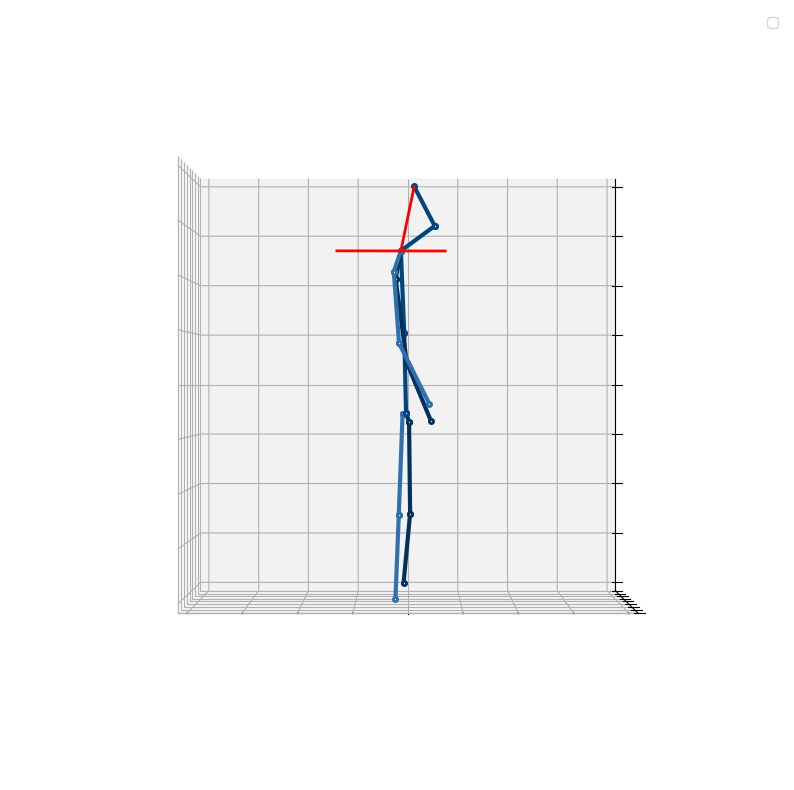

In [197]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def rotate_keypoints_y(j3d, angle_degrees):
    """ Rotate keypoints around the Y-axis to ensure upright posture. """
    angle_radians = np.deg2rad(angle_degrees)
    rotation_matrix = np.array([
        [1, 0, 0],  # X-coordinates remain the same
        [0, np.cos(angle_radians), -np.sin(angle_radians)],  # Rotation on YZ plane
        [0, np.sin(angle_radians), np.cos(angle_radians)]
    ])
    return np.dot(j3d, rotation_matrix.T)

# Load the motion data
motion = np.load('MotionBERT/examples/results/motion_small_side.npy')

# Define joint pairs
joint_pairs = [[0, 1], [1, 2], [2, 3], [0, 4], [4, 5], [5, 6], [0, 7], [7, 8], [8, 9], [8, 11], [8, 14], [9, 10], [11, 12], [12, 13], [14, 15], [15, 16]]
joint_pairs_left = [[8, 11], [11, 12], [12, 13], [0, 4], [4, 5], [5, 6]]
joint_pairs_right = [[8, 14], [14, 15], [15, 16], [0, 1], [1, 2], [2, 3]]

# Define colors
color_mid = "#00457E"
color_left = "#02315E"
color_right = "#2F70AF"

# # Get the first frame of motion data
copyed_data = motion.copy()
data_len = len(copyed_data)
threshold = int(data_len * 0.2)
middle_data = copyed_data[threshold:data_len-threshold]
print("threshold:", threshold, ", middle_data:", middle_data.shape)
mean_data = np.mean(middle_data, axis=0)
j3d = mean_data.copy()

# j3d = motion[0]

# Calculate the center of the keypoints
center_x = np.mean(j3d[:, 0])
center_y = np.mean(j3d[:, 1])
center_z = np.mean(j3d[:, 2])

# Shift the keypoints to center them around the origin
j3d_centered = j3d - np.array([center_x, center_y, center_z])

# Rotate the keypoints around the Y-axis
# Adjust the angle as necessary to tilt the person
# change this value to the desired tilt angle
j3d_rotated = rotate_keypoints_y(j3d_centered, 167)

# Create the plot
fig = plt.figure(0, figsize=(10, 10))
ax = plt.axes(projection="3d")

# Set the axis limits dynamically
ax.set_xlim(-1, 1)
ax.set_ylim(-0.8, 0.8)
ax.set_zlim(-1, 1)

# Set the axis labels
# ax.set_xlabel('X')
# ax.set_ylabel('Z')
# ax.set_zlabel('Y')

# Set the view angle
# ax.view_init(elev=0., azim=-90)
ax.view_init(elev=0., azim=-90)

# Remove the tick labels
plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

# Plot each limb
for i in range(len(joint_pairs)):
    limb = joint_pairs[i]
    xs, ys, zs = [np.array([j3d_rotated[limb[0], j], j3d_rotated[limb[1], j]]) for j in range(3)]
    if joint_pairs[i] in joint_pairs_left:
        ax.plot(xs, zs, ys, color=color_left, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)
    elif joint_pairs[i] in joint_pairs_right:
        ax.plot(xs, zs, ys, color=color_right, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)
    else:
        ax.plot(xs, zs, ys, color=color_mid, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)

ax.plot([j3d_rotated[8, 0], j3d_rotated[10, 0]], [j3d_rotated[8, 2], j3d_rotated[10, 2]], [j3d_rotated[8, 1], j3d_rotated[10, 1]], color='r', lw=2)
ax.plot([j3d_rotated[8, 0]*10, j3d_rotated[10, 0]*6], [j3d_rotated[8, 2], j3d_rotated[10, 2]], [j3d_rotated[8, 1], j3d_rotated[8, 1]], color='r', lw=2)

tutle_xz = cal_2d_distance(j3d_rotated[8, 0], j3d_rotated[8, 2], j3d_rotated[10, 0], j3d_rotated[10, 2])
turtle_rad_3dm = math.atan2(j3d_rotated[8, 1] - j3d_rotated[10, 1], tutle_xz)
turtle_deg_3dm = (turtle_rad_3dm*180)/math.pi
print("rad:", turtle_rad_3dm, "/ abs rad:", abs(turtle_rad_3dm))
print("deg:", turtle_deg_3dm, "/ abs_deg:", abs(turtle_deg_3dm))

plt.legend()
plt.show()

No handles with labels found to put in legend.


threshold: 19 , middle_data: (57, 17, 3)
rad: -1.516472602036879 / abs rad: 1.516472602036879
deg: -86.88747984393525 / abs_deg: 86.88747984393525


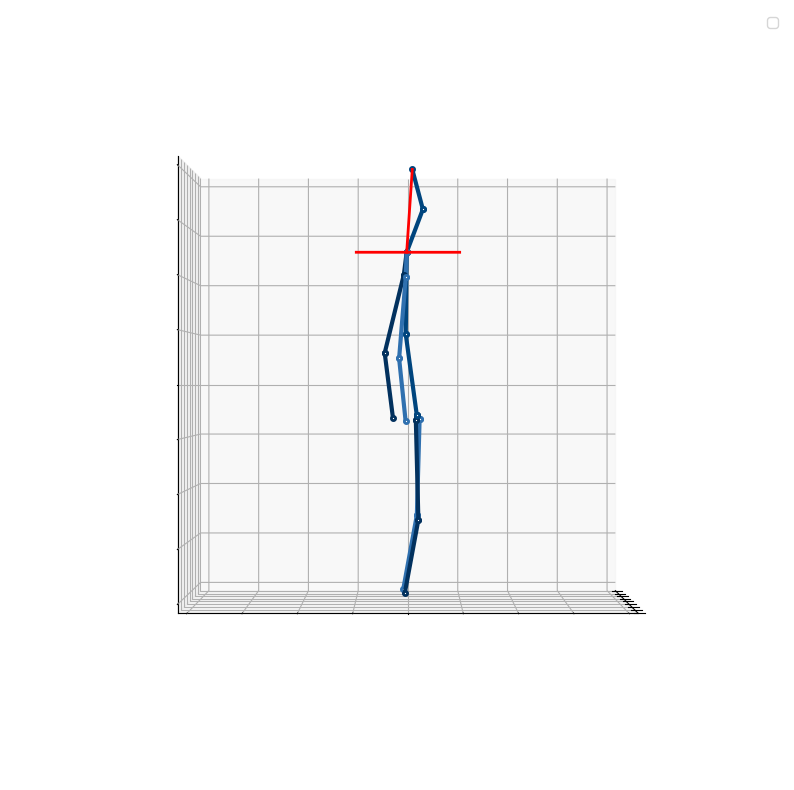

In [214]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def rotate_keypoints_y(j3d, angle_degrees):
    """ Rotate keypoints around the Y-axis to ensure upright posture. """
    angle_radians = np.deg2rad(angle_degrees)
    rotation_matrix = np.array([
        [1, 0, 0],  # X-coordinates remain the same
        [0, np.cos(angle_radians), -np.sin(angle_radians)],  # Rotation on YZ plane
        [0, np.sin(angle_radians), np.cos(angle_radians)]
    ])
    return np.dot(j3d, rotation_matrix.T)

# Load the motion data
motion = np.load('MotionBERT/examples/results/motion_small_front.npy')

# Define joint pairs
joint_pairs = [[0, 1], [1, 2], [2, 3], [0, 4], [4, 5], [5, 6], [0, 7], [7, 8], [8, 9], [8, 11], [8, 14], [9, 10], [11, 12], [12, 13], [14, 15], [15, 16]]
joint_pairs_left = [[8, 11], [11, 12], [12, 13], [0, 4], [4, 5], [5, 6]]
joint_pairs_right = [[8, 14], [14, 15], [15, 16], [0, 1], [1, 2], [2, 3]]

# Define colors
color_mid = "#00457E"
color_left = "#02315E"
color_right = "#2F70AF"

# # Get the first frame of motion data
copyed_data = motion.copy()
data_len = len(copyed_data)
threshold = int(data_len * 0.2)
middle_data = copyed_data[threshold:data_len-threshold]
print("threshold:", threshold, ", middle_data:", middle_data.shape)
mean_data = np.mean(middle_data, axis=0)
j3d = mean_data.copy()

# j3d = motion[0]

# Calculate the center of the keypoints
center_x = np.mean(j3d[:, 0])
center_y = np.mean(j3d[:, 1])
center_z = np.mean(j3d[:, 2])

# Shift the keypoints to center them around the origin
j3d_centered = j3d - np.array([center_x, center_y, center_z])

# Rotate the keypoints around the Y-axis
# Adjust the angle as necessary to tilt the person
# change this value to the desired tilt angle
j3d_rotated = rotate_keypoints_y(j3d_centered, 167)

# Create the plot
fig = plt.figure(0, figsize=(10, 10))
ax = plt.axes(projection="3d")

# Set the axis limits dynamically
ax.set_xlim(-1, 1)
ax.set_ylim(-0.8, 0.8)
ax.set_zlim(-1, 1)

# Set the axis labels
# ax.set_xlabel('X')
# ax.set_ylabel('Z')
# ax.set_zlabel('Y')

# Set the view angle
# ax.view_init(elev=0., azim=-90)
ax.view_init(elev=0., azim=0)

# Remove the tick labels
plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

# Plot each limb
for i in range(len(joint_pairs)):
    limb = joint_pairs[i]
    xs, ys, zs = [np.array([j3d_rotated[limb[0], j], j3d_rotated[limb[1], j]]) for j in range(3)]
    if joint_pairs[i] in joint_pairs_left:
        ax.plot(xs, zs, ys, color=color_left, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)
    elif joint_pairs[i] in joint_pairs_right:
        ax.plot(xs, zs, ys, color=color_right, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)
    else:
        ax.plot(xs, zs, ys, color=color_mid, lw=3, marker='o', markerfacecolor='w', markersize=3, markeredgewidth=2)

ax.plot([j3d_rotated[8, 0], j3d_rotated[10, 0]], [j3d_rotated[8, 2], j3d_rotated[10, 2]], [j3d_rotated[8, 1], j3d_rotated[10, 1]], color='r', lw=2)
ax.plot([j3d_rotated[8, 0], j3d_rotated[10, 0]], [j3d_rotated[8, 2]*40, j3d_rotated[10, 2]*12], [j3d_rotated[8, 1], j3d_rotated[8, 1]], color='r', lw=2)

tutle_xz = cal_2d_distance(j3d_rotated[8, 0], j3d_rotated[8, 2], j3d_rotated[10, 0], j3d_rotated[10, 2])
turtle_rad_3dm = math.atan2(j3d_rotated[8, 1] - j3d_rotated[10, 1], tutle_xz)
turtle_deg_3dm = (turtle_rad_3dm*180)/math.pi
print("rad:", turtle_rad_3dm, "/ abs rad:", abs(turtle_rad_3dm))
print("deg:", turtle_deg_3dm, "/ abs_deg:", abs(turtle_deg_3dm))

plt.legend()
plt.show()